# Final exercise

1) What is the average age of people in the register?

2) What is the average age of men and women?

3) How many men do you have on the register? How many women do you have on the register?

4) Show the Average Salary of the register. 

5) Who has the highest salary? Taking out unemployed, who receives less?

6) Create a bar graph and show the schooling distribution in the register.

7) Create a graph showing the relationship between schooling and who practices sport.

8) How many people like to walk on the weekend?

9) Create a heat map.

10) Graphically show the distribution between states.

In [56]:
import pandas as pd
from datetime import datetime as dt
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Importing files

In [2]:
register = pd.read_csv("cadastro - cadastro.csv")
gas_price = pd.read_csv("preco da gasolina - preco da gasolina.csv")
salary = pd.read_csv("salario_profissoes - salario_profissoes.csv")

## Data cleaning

### Register basic information

In [3]:
register.head()

,nome,sobrenome,ano_nascimento,sexo,cidade,profissão,experiencia profissional,estado_civil,filhos,lazer_final_de_semana,pratica_esporte,qual_esporte,quanta_vezes_na_semana_pratica_esporte,tem carro,escolaridade
0,Dirceu,Manolo,1985,m,São Vicente,Cientista de Dados,4,Casado,1,"estudar, academia, jogar video game,surfar",sim,academia,3.0,sim,Ensino Superior
1,Maria,Silva,1970,f,Santos,dona de casa,2,Casada,3,ver tv,não,-,0.0,não,Ensino Médio
2,Adalberto,Martins,1990,m,São Paulo,desempregado,0,Solteiro,1,jogar bola,sim,jogo bola,2.0,sim,Ensino Superior
3,João,Aparecido,1950,m,Monte Alto,Gerente de Projeto,3,Viuvo,2,Nã faço nada,NaN,-,NaN,sim,Ensino Superior
4,Marta,da Silva,1983,f,São Caetano,Auxiliar de Enfermagem,2,Solteira,0,caminhar,sim,crossfit,4.0,não,Ensimo Tecnico


In [4]:
register.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   nome                                    30 non-null     object 
 1   sobrenome                               29 non-null     object 
 2   ano_nascimento                          30 non-null     int64  
 3   sexo                                    30 non-null     object 
 4   cidade                                  30 non-null     object 
 5   profissão                               30 non-null     object 
 6   experiencia profissional                30 non-null     int64  
 7   estado_civil                            30 non-null     object 
 8   filhos                                  30 non-null     int64  
 9   lazer_final_de_semana                   30 non-null     object 
 10  pratica_esporte                         29 non-null     object 


In [5]:
# Rename columns
register.columns = ['name', 'surname', 'birth_year', 'sex', 'city', 'profession',
       'experience', 'marital_status', 'children',
       'hobbies', 'sport_flag', 'sport_description',
       'sport_frequency_week', 'car', 'schooling']

In [6]:
# Correction of data type
register.sex = register.sex.astype("category")
register.sport_flag = register.sport_flag.replace({'sim':True, "não":False}).astype("category")

# Correcting capitalization
register.schooling = register.schooling.str.lower()

In [7]:
# Basic statistics from "sex" column
register.sex.describe()

count     30
unique     2
top        m
freq      16
Name: sex, dtype: object

In [8]:
# Basic statistics from "sports practice" column
register.sport_flag.describe()

count       29
unique       2
top       True
freq        19
Name: sport_flag, dtype: object

### Gas price basic information

In [9]:
gas_price.head()

,cidade,preço
0,São Vicente,"3,45"
1,Santos,"3,33"
2,São Paulo,"3,23"
3,Monte Alto,4
4,São Caetano,"3,56"


### Salary basic information

In [10]:
salary.head()

,Profissões,salario até 3 anos,salaior +3 anos
0,Cientista de Dados,10000,14000
1,dona de casa,1200,1200
2,desempregado,0,0
3,Gerente de Projeto,5000,10000
4,Auxiliar de Enfermagem,1500,4000


In [11]:
# Rename columns
salary.columns = ["profession", "salary_minus_3y", "salary_plus_3y"]
salary.columns

Index(['profession', 'salary_minus_3y', 'salary_plus_3y'], dtype='object')

## Answering some questions

### 1) What is the average age of people in the register?

The average age is 33 years.

In [12]:
# Calculation of age
register['age'] = dt.now().year - register.birth_year
register[['age','birth_year']].head()

,age,birth_year
0,35,1985
1,50,1970
2,30,1990
3,70,1950
4,37,1983


In [13]:
# Calculation of mean
round(register.age.mean())

33

### 2) What is the average age of men and women?
The average age of men is 32 years, while women are on average 2 years older.

In [14]:
sex_age = register[['age','sex']]
sex_age = sex_age.groupby("sex").agg("mean").round()
sex_age

,age
sex,
f,34.0
m,32.0


### 3) How many men do you have on the register? How many women do you have on the register?
There ate 16 men and 14 women.

In [15]:
register.sex.value_counts()

m    16
f    14
Name: sex, dtype: int64

### 4) Show the Average Salary of the register.
The average salary for the professions in the regster is R$ 4617

Comparison of possible values in each table.

In [16]:
salary.profession.unique()

array(['Cientista de Dados', 'dona de casa', 'desempregado',
       'Gerente de Projeto', 'Auxiliar de Enfermagem', 'caixa de mercado',
       'estagiario', 'Médica', 'estudante', 'Enfermeira', 'Autonoma',
       'Caminhoneiro', 'Gerente Financeiro', 'Dentista', 'Nutricionista',
       'Pedreiro', 'Professora', 'Recursos Humanos', 'Frentista',
       'Gerente Geral', 'Analista de Sistemas', 'Biomedica',
       'Comercio Exterior'], dtype=object)

In [17]:
register.profession.unique()

array(['Cientista de Dados', 'dona de casa', 'desempregado',
       'Gerente de Projeto', 'Auxiliar de Enfermagem', 'caixa de mercado',
       'Não informado', 'estagiario', 'Médica', 'estudante', 'Enfermeira',
       'Autonoma', 'Caminhoneiro', 'Gerente Financeiro', 'Dentista',
       'Nutricionista', 'Pedreiro', 'Professora', 'Recursos Humanos',
       'Frentista', 'Gerente Geral', 'Analista de Sistemas', 'Biomedica',
       'Comercio Exterior'], dtype=object)

Since the format and all values present in the register table are available in the salary table, there is no need to tread the data in these columns before merging both tables.

In [18]:
# Merging dataframes
register_with_salary = register.merge(salary, on = 'profession')
register_with_salary.head()

,name,surname,birth_year,sex,city,profession,experience,marital_status,children,hobbies,sport_flag,sport_description,sport_frequency_week,car,schooling,age,salary_minus_3y,salary_plus_3y
0,Dirceu,Manolo,1985,m,São Vicente,Cientista de Dados,4,Casado,1,"estudar, academia, jogar video game,surfar",True,academia,3.0,sim,ensino superior,35,10000,14000
1,Maria,Silva,1970,f,Santos,dona de casa,2,Casada,3,ver tv,False,-,0.0,não,ensino médio,50,1200,1200
2,Adalberto,Martins,1990,m,São Paulo,desempregado,0,Solteiro,1,jogar bola,True,jogo bola,2.0,sim,ensino superior,30,0,0
3,Lucas,Silva e Silva,1995,m,Goias,desempregado,1,Solteiro,0,estudo,True,correr na rua,4.0,não,ensino superior,25,0,0
4,João,Aparecido,1950,m,Monte Alto,Gerente de Projeto,3,Viuvo,2,Nã faço nada,NaN,-,NaN,sim,ensino superior,70,5000,10000


In [19]:
# Selecting expected salary
register_with_salary['expected_salary']= np.where(
    register_with_salary['experience']<=3,
    register_with_salary.salary_minus_3y,
    register_with_salary.salary_plus_3y)
register_with_salary[['profession','experience','salary_minus_3y','salary_plus_3y','expected_salary']].head()

,profession,experience,salary_minus_3y,salary_plus_3y,expected_salary
0,Cientista de Dados,4,10000,14000,14000
1,dona de casa,2,1200,1200,1200
2,desempregado,0,0,0,0
3,desempregado,1,0,0,0
4,Gerente de Projeto,3,5000,10000,5000


In [20]:
round(register_with_salary.expected_salary.mean())

4617

### 5) Who has the highest salary? Taking out unemployed, who receives less?
The person with the highest salary is Mirtes: 44-year-old married doctor (5 years of experience) with 2 kids. She practices crossfit 3 times per week, has a car. Her expected salary is R$ 12k.

Who receives less, besides unemployed and students, are Maria Silva and Vilma Narsiza. 

In [21]:
# Filtering the information of the person who has the highest salary
register_with_salary[register_with_salary['expected_salary'] == register_with_salary['expected_salary'].max()]

,name,surname,birth_year,sex,city,profession,experience,marital_status,children,hobbies,sport_flag,sport_description,sport_frequency_week,car,schooling,age,salary_minus_3y,salary_plus_3y,expected_salary
9,Mirtes,NaN,1976,f,Vitoria,Médica,5,Casada,2,leitura e ficar com os filhos,True,crossfit,3.0,sim,ensino superior,44,12000,20000,20000


In [22]:
# Filtering the information of the person who has the lowest salary and is not unempoyed or a student
register_with_salary[register_with_salary['expected_salary'] == 
                     register_with_salary[(register_with_salary['profession']!='desempregado')
                                          &(register_with_salary['profession'] != 'estudante')]['expected_salary'].min()]

,name,surname,birth_year,sex,city,profession,experience,marital_status,children,hobbies,sport_flag,sport_description,sport_frequency_week,car,schooling,age,salary_minus_3y,salary_plus_3y,expected_salary
1,Maria,Silva,1970,f,Santos,dona de casa,2,Casada,3,ver tv,False,-,0.0,não,ensino médio,50,1200,1200,1200
6,Vilma,Narsiza,1995,f,Minas Gerais,caixa de mercado,4,Solteira,4,barzinho com os amigos,True,crossfit,3.0,não,ensino médio,25,900,1200,1200


### 6) Create a bar graph and show the schooling distribution in the register.

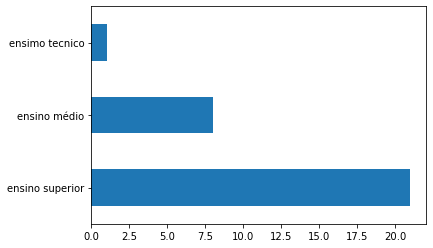

In [23]:
frequency_schooling = register.schooling.value_counts()
frequency_schooling.plot(kind='barh')

### 7) Create a graph showing the relationship between schooling and who practices sport.


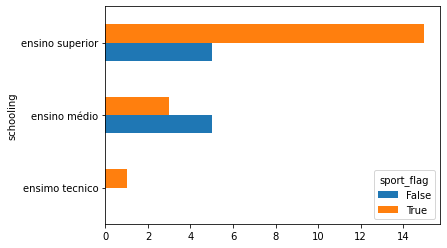

In [24]:
pd.crosstab(register.schooling,register.sport_flag).plot(kind="barh")

### 8) How many people like to walk on the weekend?

In [53]:
hobbies = register.hobbies.str.lower().str.replace('\n', ' ')
hobbies_2 = pd.DataFrame(
                hobbies.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0)
            ).reset_index()

hobbies_2.columns = ['hobbie', 'count_occurrences']
hobbies_2['hobbie'] = hobbies_2['hobbie'].str.strip(',').str.strip(".")
hobbies_2 = hobbies_2[(hobbies_2['hobbie'] == "caminhar")].groupby('hobbie').sum()
hobbies_2
#hobbies_2[(hobbies_2['hobbie'] == "caminhar")]

,count_occurrences
hobbie,
caminhar,4.0


### 9) Create a heat map


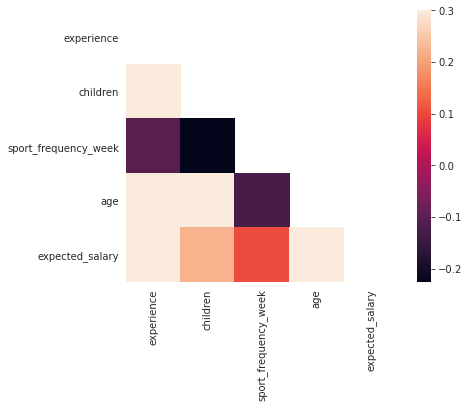

In [71]:
selection = register_with_salary[["experience", "children", "sport_frequency_week", "age", "expected_salary"]].dropna()
corr = selection.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

### 10) Graphically show how many people are in each state.

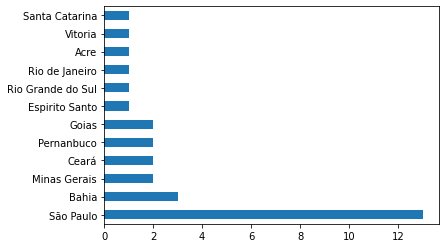

In [72]:
state_dict = {
    "São Vicente": "São Paulo",
    "São Caetano": "São Paulo",
    "Monte Alto": "São Paulo",
    "Aparecida": "São Paulo",
    "Vitória": "Espírito Santo",
    "Santo Andre": "São Paulo",
    "Santos": "São Paulo",
    "Fortaleza": "Ceará"}
states = register.city.replace(state_dict).value_counts()
states.plot(kind='barh')